Spam Mail Classification

Group Name:  dynamic3

Swati Kumari(12010150)

Harshit Choudhary(12010260)

In [ ]:
#ML Project:- Spam mail classification


#import all the needed libraries
import mailbox
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from textblob import TextBlob
import pandas
import sklearn
#import cPickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve

#import metrics libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
#function to get email text from email body
def getmailtext(message): #getting plain text 'email body'
    body = None
    #check if mbox email message has multiple parts
    if message.is_multipart():
        for part in message.walk():
            if part.is_multipart():
                for subpart in part.walk():
                    if subpart.get_content_type() == 'text/plain':
                        body = subpart.get_payload(decode=True)
            elif part.get_content_type() == 'text/plain':
                body = part.get_payload(decode=True)
    #if message only has a single part            
    elif message.get_content_type() == 'text/plain':
        body = message.get_payload(decode=True)
    #return mail text which concatenates both mail subject and body
    mailtext=str(message['subject'])+" "+str(body)
    return mailtext


In [ ]:
from google.colab import drive  #importing drive to access files
drive.mount('/content/gdrive',force_remount=True)

#read spam mbox email file
m1='/content/gdrive/My Drive/Colab Notebooks/Mails/spam1.mbox'
m2='/content/gdrive/My Drive/Colab Notebooks/Mails/spam2.mbox'
m3='/content/gdrive/My Drive/Colab Notebooks/Mails/spam3.mbox'

spam=[m1,m2]

#create list which contains mail text for each spam email message
mlist_spam = []
i=0
for m in spam:
  mbox=mailbox.mbox(m)
  for message in mbox:
     mlist_spam.append(getmailtext(message))
     i=i+1
print('spam: ',i)

#read ham mbox email file from google drive
m4='/content/gdrive/My Drive/Colab Notebooks/Mails/Inbox.mbox'

#create list which contains mail text for each ham email message
mlist_ham = []
j=0
mbox=mailbox.mbox(m4)
for message in mbox:
  mlist_ham.append(getmailtext(message))
  j=j+1
  if(j==500):
    break
print('ham: ',j)



j=1
print("Spam Emails.................")
for x in mlist_spam:
  print(j,x)
  if(j==100):
    break
  j=j+1

j=1
print("\nHam emails...................")
for x in mlist_ham:
  print(j,x)
  if(j==100):
    break
  j=j+1


Mounted at /content/gdrive
spam:  121
ham:  500
Spam Emails.................
1 =?UTF-8?B?LuKchS5DbGllbnQgSUQ6MzQzOTAtMDY5NCAsIENvbmZpcm0geW91ciBDb3N0Y28gJDEwMC4uLiDwn46BIEV4cGlyZS4uU29vbio=?= b'PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7\r\nPH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7\r\nPH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7\r\nPH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X7PH64DJ7JOZ3U1X

In [ ]:
#create 2 dataframes for ham and spam mails which contain the following info-
#Mail text, mail length, mail is ham/spam label
import pandas as pd
spam_df = pd.DataFrame(mlist_spam, columns=["message"])
spam_df["label"] = "spam"

spam_df['length'] = spam_df['message'].map(lambda text: len(text))
print(spam_df.head())

ham_df = pd.DataFrame(mlist_ham, columns=["message"])
ham_df["label"] = "ham"

ham_df['length'] = ham_df['message'].map(lambda text: len(text))
print(ham_df.head())

                                             message label  length
0  =?UTF-8?B?LuKchS5DbGllbnQgSUQ6MzQzOTAtMDY5NCAs...  spam    5257
1  =?UTF-8?B?Q29uZ3JhdHVsYXRpb25zICEgWW91IGFyZSBl...  spam     105
2  Participate and invite the best coders you kno...  spam    3183
3  Be the Data Engineer - make a smart career mov...  spam      53
4            Get Insta EMI Card in 30 Seconds b'...'  spam      39
                                             message label  length
0                     Help us serve you better! None   ham      30
1  =?utf-8?B?VGFrZSBQREYgcG93ZXIgZXZlcnl3aGVyZQ==...   ham      53
2  Your Google Play Music data will be deleted so...   ham    1700
3  =?utf-8?q?What_is_the_fee_for_an_M=2ETech_in_I...   ham    4666
4  Re: Hkchy b"Hey who are you?\r\n\r\nOn Mon, 15...   ham     791


In [ ]:
#merge and shuffle dataframes for ham and spam mails
mail_df = pd.concat([spam_df,ham_df])
from sklearn.utils import shuffle
mail_df = shuffle(mail_df)
len(mail_df)

621

In [ ]:
#Splitting the data frame into train and test with test size 33%
mail_train, mail_test, y_train, y_test = train_test_split(mail_df['message'],mail_df['label'],test_size=0.33, random_state=42)
#The number "42" was apparently chosen as a tribute to the "Hitch-hiker's Guide" books by Douglas
#Adams, as it was supposedly the answer to the great question of "Life, the universe, 
#and everything" as calculated by a computer (named "Deep Thought") created specifically to solve it.

l=len(mail_test)
k=0
for i in range(l):
  print(i,mail_test.iloc[i],'\n ',y_test.iloc[i])
  if(y_test.iloc[i]=='spam'):
    k=k+1
print(k)

0 Select a 2021 Health Plan today 2633 b'\r\n\r\n\r\n--_----------=_1Q76p0s_Nextpart_1Q76p0s117381553324691EzJH\r\nContent-Type: text/html; charset=utf-8\r\nContent-Transfer-Encoding: Hexa\r\n\r\n<div class="js-equal grid__item grid__box"> \r\n<h3 class="heading heading--sub-section">WHY STUDY ABROAD?</h3>\r\n<p>Study Abroad is a great opportunity to enhance your employability skills, experience different cultures, meet new people and explore your degree from a different perspective</p>\r\n</div>\r\n \r\n<div class="js-equal grid__item grid__box">\r\n<h3 class="heading heading--sub-section">PREPARE TO APPLY</h3>\r\n<p>Find out more about the application process, researching your destination, how much it will cost and more.</p>\r\n</div>\r\n<div class="js-equal grid__item grid__box">"\r\n\r\n<h3 class="heading heading--sub-section">GET READY TO GO</h3>\r\n<p>Congratulations on being accepted for Study Abroad! Now it\'s time to plan the details, like where you\'ll stay, organising your v

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
nltk.download('punkt')
nltk.download('wordnet')
#for each word in the email text, get the base form of the word and return the list of base words
stop_words = set(stopwords.words('english')) 
def split_into_lemmas(message):
    message = message.lower()
    words = TextBlob(message).words #Tokenization of message into words 
    Filtered_words=[w for w in words if not w in stop_words]
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in Filtered_words]
print(split_into_lemmas('am is are hello'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['hello']


In [ ]:
#function to apply the count vectorizer(BOW) and TF-IDF transforms to a set of input features
def features_transform(mail):
    #get the bag of words for the mail text
    bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(mail_train)
    print('Number of features: ',len(bow_transformer.vocabulary_))
    messages_bow = bow_transformer.transform(mail)
    print('Bag of Words:')
    print(messages_bow)
    #print sparsity value
    print('\nsparse matrix shape:', messages_bow.shape)
    print('number of non-zeros:', messages_bow.nnz) 
    print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))
    print(messages_bow.shape[1])
    #apply the TF-IDF transform to the output of BOW
    tfidf_transformer  = TfidfTransformer().fit(messages_bow)
    messages_tfidf = tfidf_transformer.transform(messages_bow)
    print('TF-IDF of the data:-')
    print(messages_tfidf)
    #print(messages_tfidf.shape)
    #return result of transforms
    return messages_tfidf

In [ ]:
#transform training set features into a set of useful features to build models
print('Feature transformation of training data:-')
train_features=features_transform(mail_train)

#transform test set features into a set of useful features to build models
print('Feature transformation of test data:-')
test_features=features_transform(mail_test)

Feature transformation of training data:-
Number of features:  13758
Bag of Words:
  (0, 187)	1
  (0, 1119)	1
  (0, 1133)	1
  (0, 1184)	1
  (0, 1189)	1
  (0, 1241)	1
  (0, 1381)	2
  (0, 1382)	1
  (0, 1383)	3
  (0, 1544)	1
  (0, 1776)	1
  (0, 2015)	1
  (0, 2538)	1
  (0, 2588)	2
  (0, 2639)	1
  (0, 2811)	1
  (0, 2824)	1
  (0, 2947)	1
  (0, 3157)	1
  (0, 3372)	1
  (0, 3998)	3
  (0, 4034)	1
  (0, 4387)	1
  (0, 4388)	1
  (0, 4538)	1
  :	:
  (415, 5423)	2
  (415, 5531)	1
  (415, 6310)	1
  (415, 6472)	1
  (415, 7027)	2
  (415, 7123)	2
  (415, 8049)	5
  (415, 8806)	1
  (415, 9285)	1
  (415, 9449)	1
  (415, 9632)	2
  (415, 10077)	1
  (415, 10177)	1
  (415, 10225)	1
  (415, 10334)	2
  (415, 11476)	2
  (415, 11496)	1
  (415, 11497)	2
  (415, 11517)	1
  (415, 11527)	1
  (415, 11528)	1
  (415, 11567)	2
  (415, 11635)	1
  (415, 11938)	1
  (415, 11939)	1

sparse matrix shape: (416, 13758)
number of non-zeros: 37566
sparsity: 0.66%
13758
TF-IDF of the data:-
  (0, 13314)	0.21657575036125076
  (0, 1258

In [ ]:
#To get the performance of each model we have used, we have a function which takes actaul value 
#of y of test and and predicted value of y of test and prints the associated model performance metrics.

def model_assessment(y_test,predicted_class):
    print('confusion matrix')
    print(confusion_matrix(y_test,predicted_class))
    print('accuracy')
    print(accuracy_score(y_test,predicted_class))
    print('precision')
    print(precision_score(y_test,predicted_class,pos_label='spam'))
    print('recall')
    print(recall_score(y_test,predicted_class,pos_label='spam'))
    print('f-Score')
    print(f1_score(y_test,predicted_class,pos_label='spam'))
    print('AUC')
    print(roc_auc_score(np.where(y_test=='spam',1,0),np.where(predicted_class=='spam',1,0)))
    plt.matshow(confusion_matrix(y_test, predicted_class), cmap=plt.cm.binary, interpolation='nearest')
    plt.title('confusion matrix')
    plt.colorbar()
    plt.ylabel('expected label')
    plt.xlabel('predicted label')

In [ ]:
#Multinomial NB model, creating and fitting
modelNB=MultinomialNB(alpha=0) #alpha is smoothing parameter
modelNB.fit(train_features,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0, class_prior=None, fit_prior=True)

In [ ]:
predicted_class_NB=modelNB.predict(test_features)
count=0
print('Actual','Predicted')
for i in range(205):
  print(y_test.iloc[i],predicted_class_NB[i])
  if y_test.iloc[i]!=predicted_class_NB[i]:
    count=count+1
print('Number of missmatch: ',count)
#print(predicted_class_NB)
#print(y_test)

Actual Predicted
spam ham
ham ham
ham ham
ham ham
ham ham
spam ham
spam ham
ham spam
spam ham
ham ham
ham ham
ham ham
spam spam
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
spam spam
spam spam
ham ham
ham ham
ham ham
spam ham
ham ham
ham ham
ham ham
ham ham
ham ham
spam ham
ham ham
ham ham
ham ham
ham spam
ham ham
ham ham
ham ham
ham ham
ham ham
spam ham
ham ham
ham ham
ham ham
ham spam
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham spam
spam spam
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
spam spam
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
ham ham
spam ham
spam ham
ham ham
ham ham
ham ham
spam ham
ham ham
ham ham
spam spam
ham ham
ham ham
ham ham
ham ham
ham spam
ham ham
ham ham
ham ham
ham ham
spam spam
ham ham
ham ham
ham ham
ham spam
ham ham
ham ham
spam ham
ham ham
ham ham
ham ham
ham spam
ham ham
ham ham
ham ham
spam spam
ham ham
spam spam
spam ham
ham ham
ham ham
ha

confusion matrix
[[154  10]
 [ 18  23]]
accuracy
0.8634146341463415
precision
0.696969696969697
recall
0.5609756097560976
f-Score
0.6216216216216217
AUC
0.75


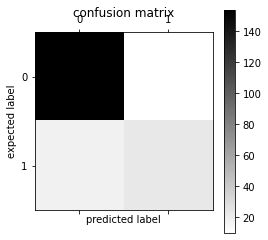

In [ ]:
#Measuring performance of Multinomial NB
model_assessment(y_test,predicted_class_NB)

In [ ]:
#create and fit tree model
model_tree=DecisionTreeClassifier()

In [ ]:
model_tree.fit(train_features,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predicted_class_tree=model_tree.predict(test_features)
print(predicted_class_tree)

['ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham'
 'spam' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam'
 'spam' 'ham' 'spam' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam'
 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam'
 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham'
 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham'
 'ham' 'spam' 'ham' 'ham' 'ham' 'spam' 'spam' 'spam' 'ham' 'ham' 'spam'
 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'spam'
 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham'
 'ham' 'ham' 'spam' 'ham' 'spam' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham'
 'spam' 'spam' 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham' 'spam' 'ham'
 'ham' 'ham' 'spam' 'ham' 'spam' 'ham' 'ham' 'spam' 'ham' 'ham' 'ha

confusion matrix
[[138  26]
 [  9  32]]
accuracy
0.8292682926829268
precision
0.5517241379310345
recall
0.7804878048780488
f-Score
0.6464646464646465
AUC
0.8109756097560975


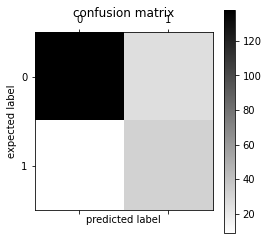

In [ ]:
model_assessment(y_test,predicted_class_tree)

In [ ]:
#create and fit SVM model
model_svm=SVC()

In [ ]:
model_svm.fit(train_features,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicted_class_svm=model_svm.predict(test_features)

confusion matrix
[[154  10]
 [ 17  24]]
accuracy
0.8682926829268293
precision
0.7058823529411765
recall
0.5853658536585366
f-Score
0.64
AUC
0.7621951219512195


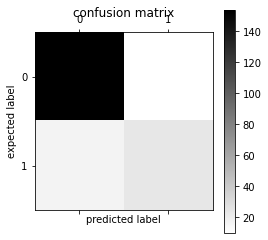

In [ ]:
model_assessment(y_test,predicted_class_svm)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#create and fit model
model_rf=RandomForestClassifier(n_estimators=20,criterion='entropy')

In [ ]:
model_rf.fit(train_features,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predicted_class_rf=model_rf.predict(test_features)

confusion matrix
[[145  19]
 [ 12  29]]
accuracy
0.848780487804878
precision
0.6041666666666666
recall
0.7073170731707317
f-Score
0.6516853932584269
AUC
0.7957317073170732


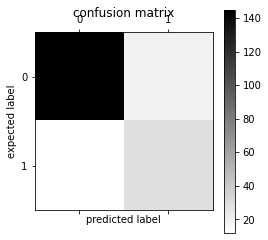

In [ ]:
model_assessment(y_test,predicted_class_rf)